<a href="https://colab.research.google.com/github/Remonah-3/Github_Assignment/blob/master/HouseAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

data = pd.read_csv("train.csv")
print(data.head())

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

In [2]:
print("Shape:", data.shape)
data.info()

print("\nTarget variable 'SalePrice' summary:")
print(data['SalePrice'].describe())

print("\nNumeric features statistics:")
print(data.describe())

Shape: (1460, 81)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int

Columns with missing values:
LotFrontage     0.177397
Alley           0.937671
MasVnrType      0.597260
MasVnrArea      0.005479
BsmtQual        0.025342
BsmtCond        0.025342
BsmtExposure    0.026027
BsmtFinType1    0.025342
BsmtFinType2    0.026027
Electrical      0.000685
FireplaceQu     0.472603
GarageType      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
GarageQual      0.055479
GarageCond      0.055479
PoolQC          0.995205
Fence           0.807534
MiscFeature     0.963014
dtype: float64
Shape after cleaning: (1459, 63)


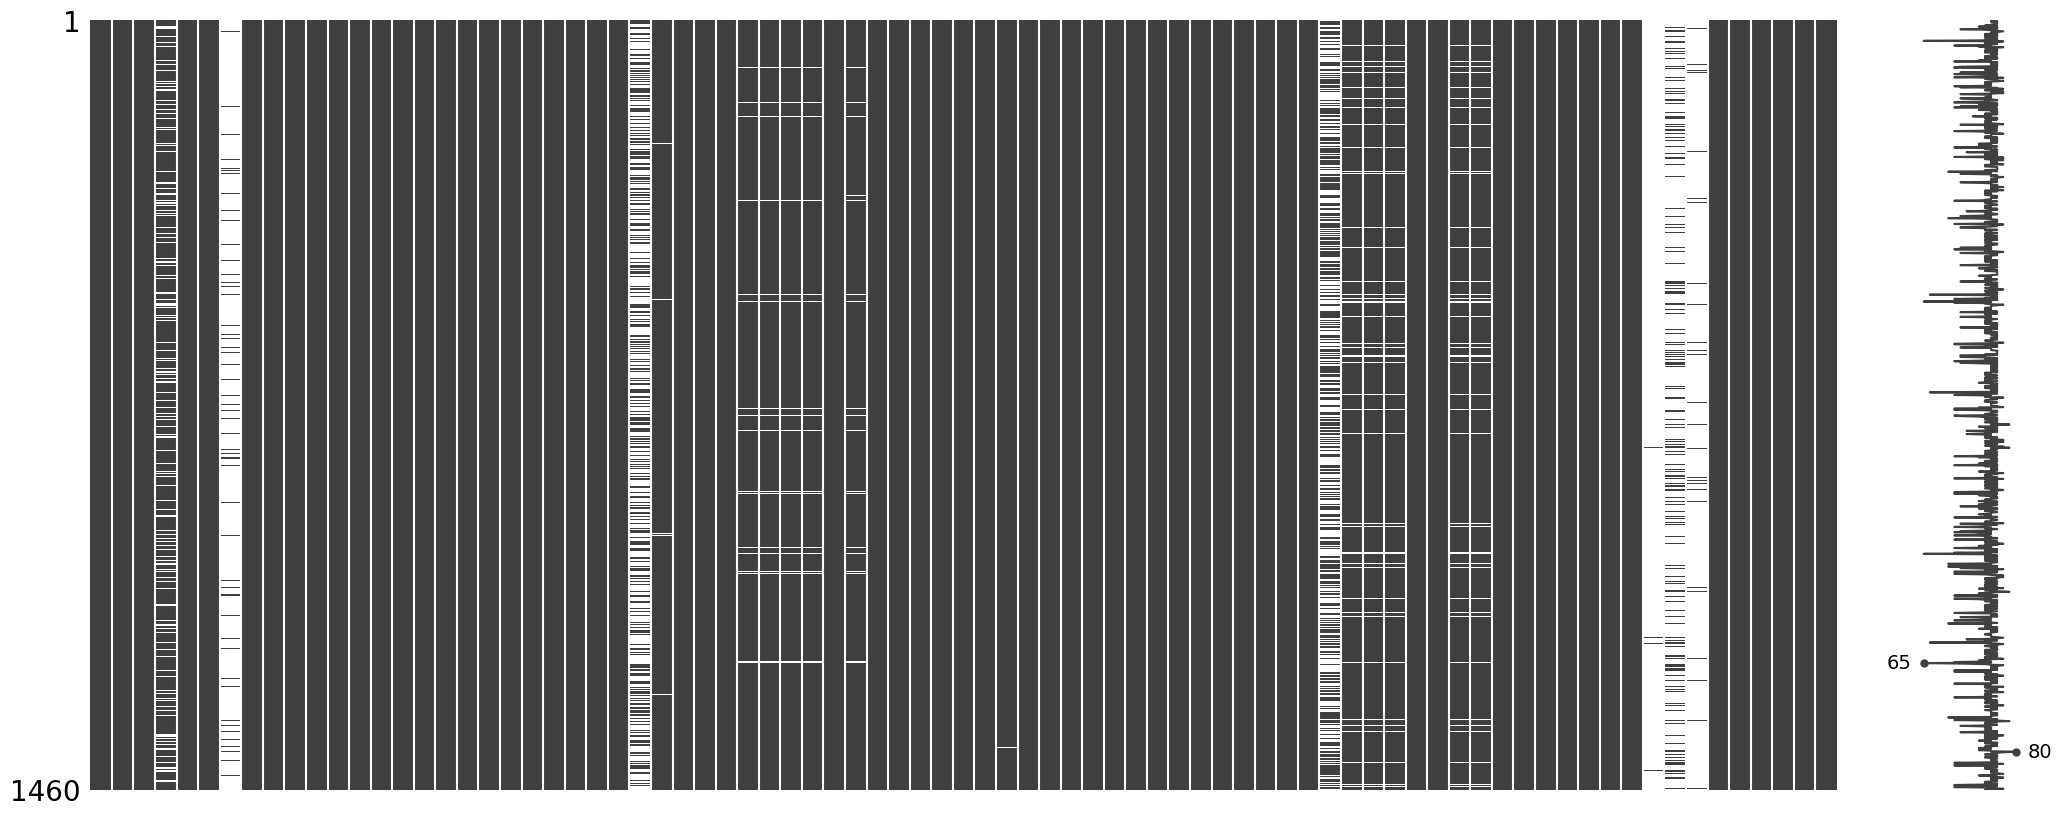

In [3]:
import missingno as msno

msno.matrix(data)

missing_ratio = data.isnull().sum() / len(data)
print("Columns with missing values:")
print(missing_ratio[missing_ratio > 0])

threshold = 5
columns_to_drop = missing_ratio[missing_ratio * len(data) >= threshold].index
data = data.drop(columns=columns_to_drop)

data = data.dropna()
print("Shape after cleaning:", data.shape)

**Kurtosis** is a measure of the concentration of a distribution. It describes how much a distribution is peaked or flat. A high value means a sharp peak and heavy tails, while a low value means a flatter shape.

**Skewness** is a measure of the asymmetry of a distribution. It describes whether a distribution is uneven or lopsided. A positive skew means the tail stretches more to the right, and a negative skew means the tail stretches more to the left.

Kurtosis: 6.529263049673958
Skewness: 1.8819429948035529
Kurtosis after log transform: 0.806927847502148
Skewness after log transform: 0.12131775882415026


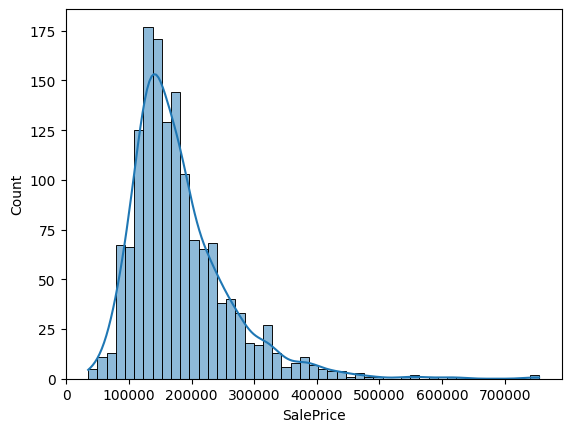

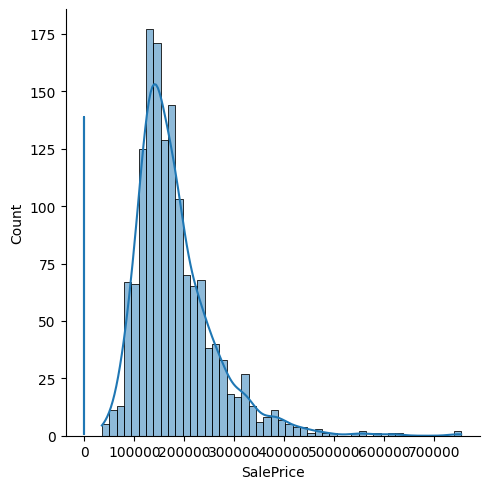

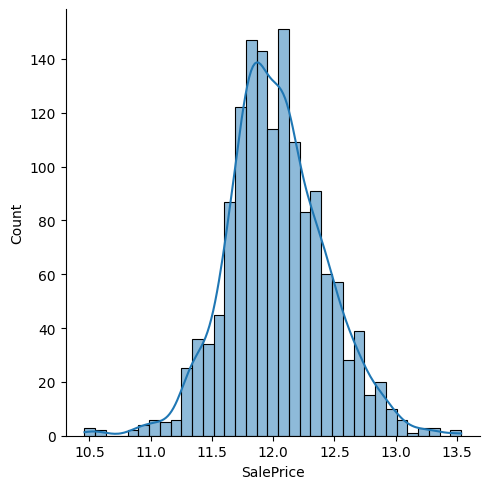

In [4]:
import seaborn as sns
import numpy as np

sns.histplot(data['SalePrice'], kde=True)
sns.displot(data['SalePrice'], kde=True)

print("Kurtosis:", data['SalePrice'].kurtosis())
print("Skewness:", data['SalePrice'].skew())

log_price = np.log(data['SalePrice'])

sns.histplot(log_price, kde=True)
sns.displot(log_price, kde=True)

print("Kurtosis after log transform:", log_price.kurtosis())
print("Skewness after log transform:", log_price.skew())

The original distribution of SalePrice is skewed to the right, meaning most house prices are lower but a few are much higher. This shows the data is not normally distributed, which can reduce the accuracy of models like linear regression that expect normal data. By taking the logarithm of SalePrice, we make the distribution more balanced, reducing skewness and extreme values. This helps the data get closer to a normal distribution, which can improve the accuracy and reliability of our predictive models.

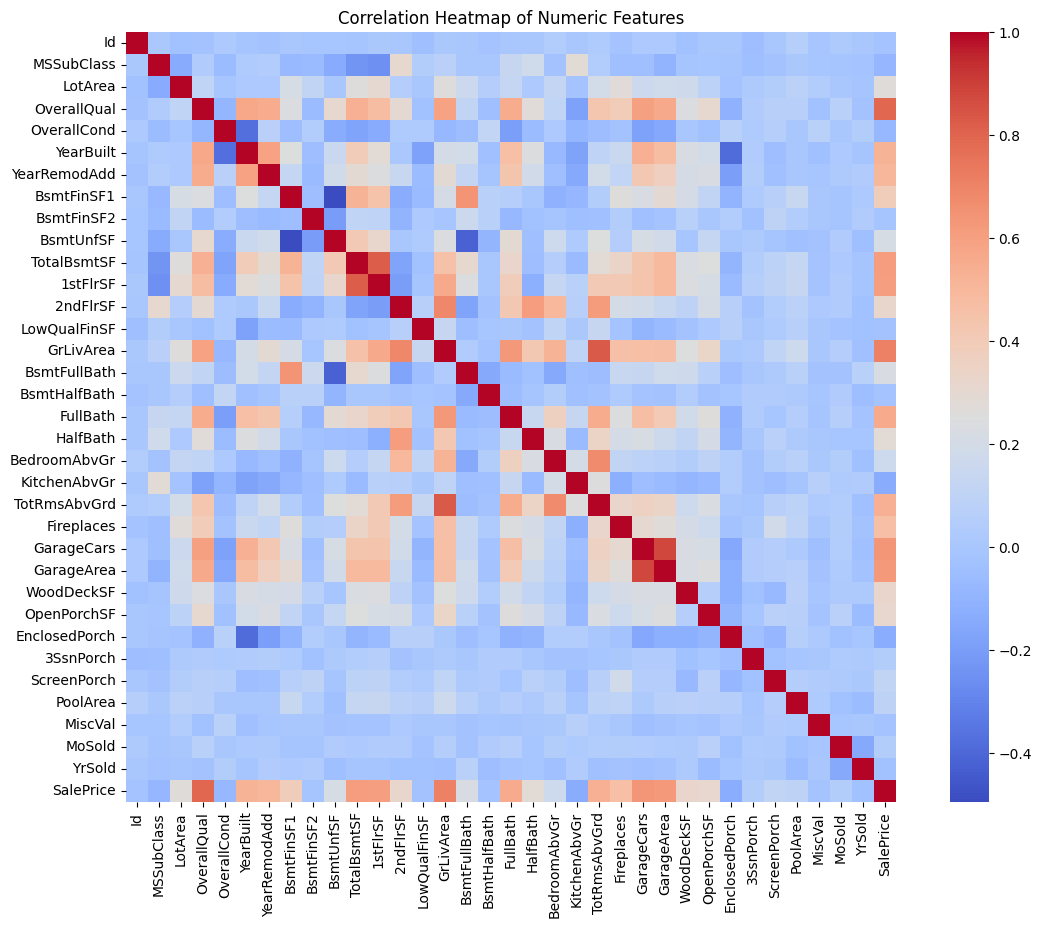

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_data = data.select_dtypes(include=['float64', 'int64'])

corr = numeric_data.corr()

plt.figure(figsize=(14, 10))
sns.heatmap(corr, cmap='coolwarm', square=True)
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

The heatmap of the full correlation matrix shows how strongly each pair of features is related. Darker colors indicate higher correlation. This helps identify redundant features and potential features that can predict the target variable.

<function matplotlib.pyplot.show(close=None, block=None)>

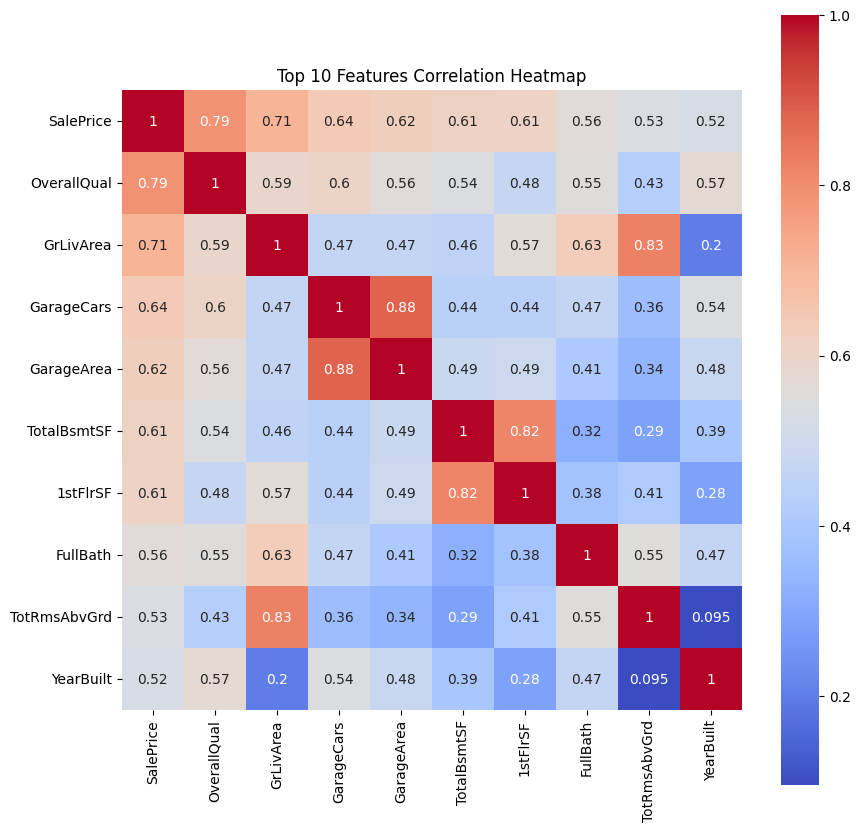

In [6]:
top10_corr = corr['SalePrice'].abs().sort_values(ascending=False).head(10).index

plt.figure(figsize=(10, 10))
sns.heatmap(numeric_data[top10_corr].corr(), annot=True, cmap='coolwarm', square=True)
plt.title("Top 10 Features Correlation Heatmap")
plt.show

We picked the 10 features that are most correlated to the target, LogSalePrice, and made a heatmap of their correlations. Features like OverallQual, GrLivArea, and GarageCars have a strong positive correlation with house price. This helps us see which features are most important and how they affect each other in determining house prices.

In [10]:
small_table = corr.copy()

for col in small_table.columns:
    small_table.loc[col, col:] = None

pairs = small_table.stack()
top3 = pairs.abs().sort_values(ascending=False).head(3)

print("Top 3 highly correlated pairs:")
for (first, second) in top3.index:
    print(f"{first} and {second} have a correlation of: {corr.loc[first, second]:.2f}")


Top 3 highly correlated pairs:
GarageArea and GarageCars have a correlation of: 0.88
TotRmsAbvGrd and GrLivArea have a correlation of: 0.83
1stFlrSF and TotalBsmtSF have a correlation of: 0.82


The top three strongest feature pairs show a clear relationship between house characteristics. OverallQual and GrLivArea are positively correlated, meaning higher-quality houses usually have larger living areas. GarageCars and GarageArea are also strongly positively correlated, so homes with more garage spaces tend to have bigger garages. Finally, TotalBsmtSF and 1stFlrSF are positively correlated, indicating that houses with larger basements often have larger first floors. These strong correlations highlight how certain features pair together and influence house prices.